# Library

In [504]:
import os
import pandas as pd
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sb
import matplotlib.pyplot as plt
# from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Read CSV

In [505]:
filename = "tiktok_data_scrapped.csv"
df = pd.read_csv(filename)
df = df[df['score'] != 3]

In [506]:
df_new = df.sample(n=3200)  # Simpan DataFrame yang dikurangi ke variabel reduced_df
# df_new['score'] = 3

In [507]:
df_new.drop(columns = ['userName', 'at'], inplace = True)
df_new.columns = ['score', 'content']
df_new.head()

,score,content
51092,1,Point nonton video durasi 30 menit macet dan m...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...
16345,5,Foto nya gak bisa di simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...


In [508]:
# JUMLAH BARIS DAN KOLOM SEBELUM DI CLEANING

# computing number of rows
rows = len(df_new.axes[0])
 
# computing number of columns
cols = len(df_new.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  3200
Number of Columns:  2


# Preprocessing Data

## Labeling From Score

In [509]:
df_new['label'] = df['score'].map({1:0, 2:0, 4:1, 5:1})
df_new

,score,content,label
51092,1,Point nonton video durasi 30 menit macet dan m...,0
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1
16345,5,Foto nya gak bisa di simpan,1
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1
...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1
8704,5,Kerin bagus sanggar membatu bangget,1
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1


## Remove URL

In [510]:
#remove url
def remove_url(text):
  text = re.sub(r'http\S+', '', text)
  return text

df_new['remove_url'] = df_new['content'].apply(lambda x: remove_url(x))
df_new

,score,content,label,remove_url
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...
...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ..."


## Remove Emoji and Case Folding

In [511]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df_new['emoji_casefold'] = df_new['remove_url'].apply(lambda x: clean_text(x))
df_new

,score,content,label,remove_url,emoji_casefold
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...
...,...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...


## Remove Whitespace

In [512]:
def whitespaceRemoval(text):
    text = text.replace('\n',' ')
    return text
df_new['rm_whitespace'] = df_new['emoji_casefold'].apply(lambda x: whitespaceRemoval(x))

df_new

,score,content,label,remove_url,emoji_casefold,rm_whitespace
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...
...,...,...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...,apk nya bagus banget aku suka dan buat lo ...


## RM Stopword, Stemming, and Tokenizing



In [513]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [514]:
#Import stopword
nltk.download('stopwords')

stopwords_indo = stopwords.words('indonesian')
custom_stopwords = ['yg', 'km', 'u', 'x', 'dengan', 'ia','bahwa','oleh', 'klu', "aa", "aaa","aada", "yuu", "yuuu", "yy", "yya", "yyy"] #tambah disini
stopwords_indo += custom_stopwords

stop_factory = StopWordRemoverFactory().get_stop_words()

dictionary = ArrayDictionary(stop_factory)
str = StopWordRemover(dictionary)

print(stopwords_indo)

#sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

def cleen_tweet(tweet):

  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)


  tweets_clean = []

  for word in tweet_tokens:
    if(word not in stop_factory and
       word not in string.punctuation):
      
      stem_word = stemmer.stem(word)
      tweets_clean.append(stem_word)
  return tweets_clean


df_new['rm_stopwords'] = df_new['rm_whitespace'].apply(lambda x: cleen_tweet(x))
df_new.head()
  


['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mabiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"[point, nonton, video, durasi, menit, macet, m..."
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"[aplikasi, guna, selagi, bosan]"
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"[foto, gak, simpan]"
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"[update, ngelag, tiktok, seppia]"
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"[aplikasi, bagus, vitur, bagus, tik, tok, fidi..."


## RM Punctuation

In [515]:
#join atau nyatuin text nya lagi
def remove_punct(tweet):
  tweet = " ".join([char for char in tweet if char not in string.punctuation])
  return tweet

df_new['remove_punct'] = df_new['rm_stopwords'].apply(lambda x: remove_punct(x))
# df.head(100)
df_new
  

,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords,remove_punct
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"[point, nonton, video, durasi, menit, macet, m...",point nonton video durasi menit macet masuk ko...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"[aplikasi, guna, selagi, bosan]",aplikasi guna selagi bosan
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"[foto, gak, simpan]",foto gak simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"[update, ngelag, tiktok, seppia]",update ngelag tiktok seppia
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"[aplikasi, bagus, vitur, bagus, tik, tok, fidi...",aplikasi bagus vitur bagus tik tok fidio langg...
...,...,...,...,...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,"[sistem, buruk, konten, hapus, aktivitas, tela...",sistem buruk konten hapus aktivitas telanjang ...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,"[aplikasi, bagus, suka, aplikasi, aplikasi, hi...",aplikasi bagus suka aplikasi aplikasi hibur pa...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,"[kerin, bagus, sanggar, batu, bangget]",kerin bagus sanggar batu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...,apk nya bagus banget aku suka dan buat lo ...,"[apk, bagus, banget, suka, lo, yg, suka, komen...",apk bagus banget suka lo yg suka komentar apk ...


## Remove Komen Kosong

In [516]:
df_new = df_new[df_new['remove_punct']!= '']
df_new

,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords,remove_punct
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"[point, nonton, video, durasi, menit, macet, m...",point nonton video durasi menit macet masuk ko...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"[aplikasi, guna, selagi, bosan]",aplikasi guna selagi bosan
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"[foto, gak, simpan]",foto gak simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"[update, ngelag, tiktok, seppia]",update ngelag tiktok seppia
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"[aplikasi, bagus, vitur, bagus, tik, tok, fidi...",aplikasi bagus vitur bagus tik tok fidio langg...
...,...,...,...,...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,"[sistem, buruk, konten, hapus, aktivitas, tela...",sistem buruk konten hapus aktivitas telanjang ...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,"[aplikasi, bagus, suka, aplikasi, aplikasi, hi...",aplikasi bagus suka aplikasi aplikasi hibur pa...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,"[kerin, bagus, sanggar, batu, bangget]",kerin bagus sanggar batu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...,apk nya bagus banget aku suka dan buat lo ...,"[apk, bagus, banget, suka, lo, yg, suka, komen...",apk bagus banget suka lo yg suka komentar apk ...


## Remove Duplicate

In [517]:
df_new.drop_duplicates(subset="remove_punct", keep="first", inplace=True)
df_new

C:\Users\mabiz\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords,remove_punct
51092,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"[point, nonton, video, durasi, menit, macet, m...",point nonton video durasi menit macet masuk ko...
23867,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"[aplikasi, guna, selagi, bosan]",aplikasi guna selagi bosan
16345,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"[foto, gak, simpan]",foto gak simpan
20947,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"[update, ngelag, tiktok, seppia]",update ngelag tiktok seppia
41179,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"[aplikasi, bagus, vitur, bagus, tik, tok, fidi...",aplikasi bagus vitur bagus tik tok fidio langg...
...,...,...,...,...,...,...,...,...
47708,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,"[sistem, buruk, konten, hapus, aktivitas, tela...",sistem buruk konten hapus aktivitas telanjang ...
44738,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,"[aplikasi, bagus, suka, aplikasi, aplikasi, hi...",aplikasi bagus suka aplikasi aplikasi hibur pa...
8704,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,"[kerin, bagus, sanggar, batu, bangget]",kerin bagus sanggar batu bangget
58336,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...,apk nya bagus banget aku suka dan buat lo ...,"[apk, bagus, banget, suka, lo, yg, suka, komen...",apk bagus banget suka lo yg suka komentar apk ...


## Reset Index

In [518]:
df_new = df_new.reset_index(drop=True)
df_new

,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords,remove_punct
0,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"[point, nonton, video, durasi, menit, macet, m...",point nonton video durasi menit macet masuk ko...
1,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"[aplikasi, guna, selagi, bosan]",aplikasi guna selagi bosan
2,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"[foto, gak, simpan]",foto gak simpan
3,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"[update, ngelag, tiktok, seppia]",update ngelag tiktok seppia
4,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"[aplikasi, bagus, vitur, bagus, tik, tok, fidi...",aplikasi bagus vitur bagus tik tok fidio langg...
...,...,...,...,...,...,...,...,...
3154,1,sistem sangat buruk. konten saya selalu di hap...,0,sistem sangat buruk. konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,sistem sangat buruk konten saya selalu di hap...,"[sistem, buruk, konten, hapus, aktivitas, tela...",sistem buruk konten hapus aktivitas telanjang ...
3155,5,Aplikasi nya bagus sekali saya suka dengan apl...,1,Aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,aplikasi nya bagus sekali saya suka dengan apl...,"[aplikasi, bagus, suka, aplikasi, aplikasi, hi...",aplikasi bagus suka aplikasi aplikasi hibur pa...
3156,5,Kerin bagus sanggar membatu bangget,1,Kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,kerin bagus sanggar membatu bangget,"[kerin, bagus, sanggar, batu, bangget]",kerin bagus sanggar batu bangget
3157,5,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",1,"Apk nya bagus banget aku suka ❤️ ""Dan buat Lo ...",apk nya bagus banget aku suka dan buat lo ...,apk nya bagus banget aku suka dan buat lo ...,"[apk, bagus, banget, suka, lo, yg, suka, komen...",apk bagus banget suka lo yg suka komentar apk ...


# Word Cloud

In [519]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get the list of stopwords
stopwords = set(stopwords.words('english'))

negative_list = df_new['remove_punct'][df_new.label == 0].tolist()
positive_list = df_new['remove_punct'][df_new.label == 1].tolist()


filtered_negative = " ".join(negative_list)
filtered_negative = filtered_negative.lower()

filtered_positive = " ".join(positive_list)
filtered_positive = filtered_positive.lower()

## Positif

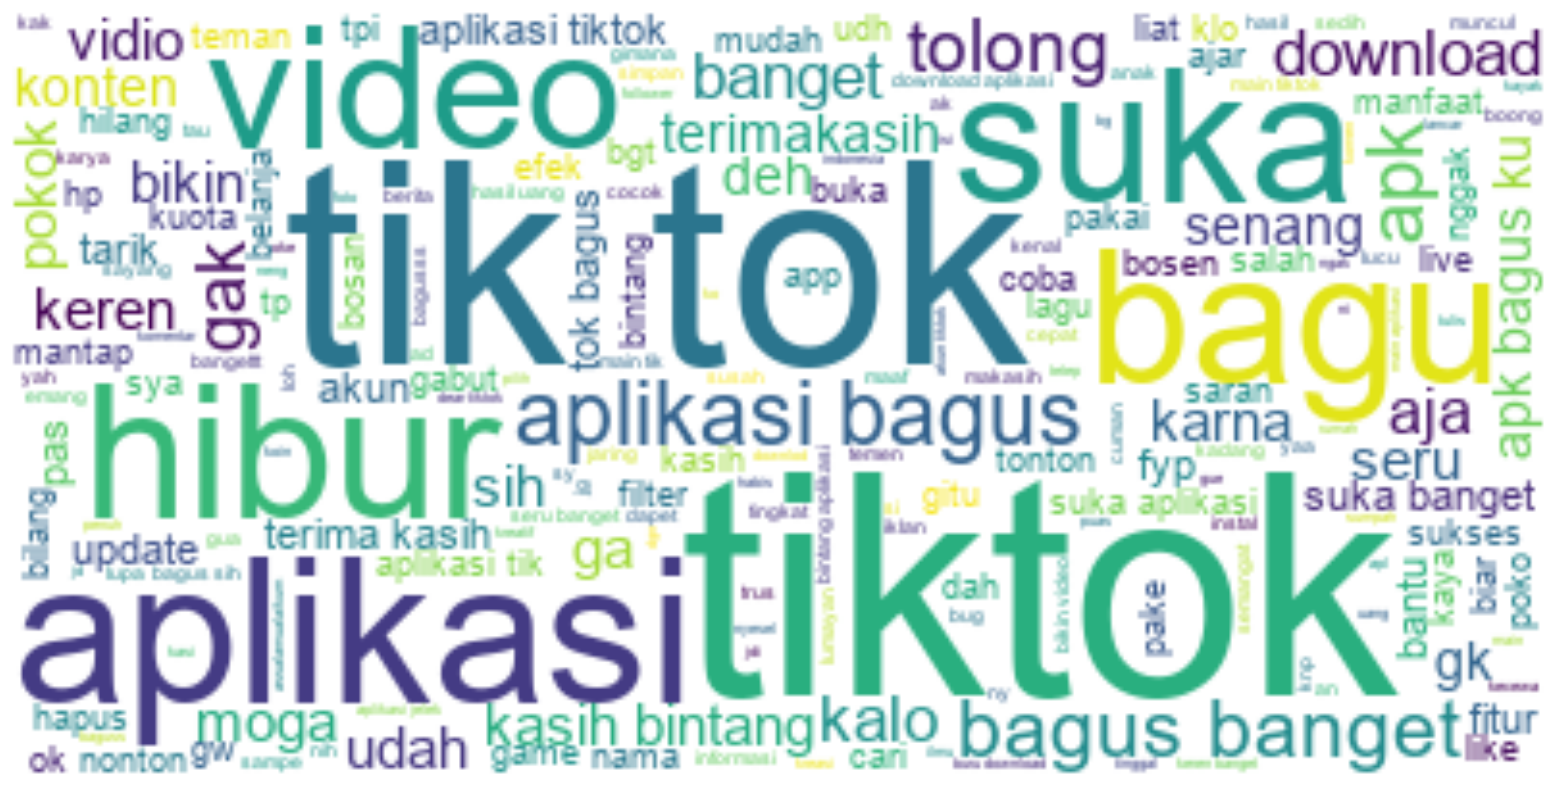

In [520]:
# Menentukan set stopwords
# stopwords = set(STOPWORDS)

# Menentukan path font Arial
font_path = "./Arial.ttf"  # Ganti dengan path yang benar ke font Arial

# Membuat objek WordCloud dengan font Arial
wordcloud = WordCloud(stopwords=stopwords_indo, background_color="white", font_path=font_path).generate(filtered_positive)

# Menampilkan WordCloud
plt.figure(figsize=(25, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negatif

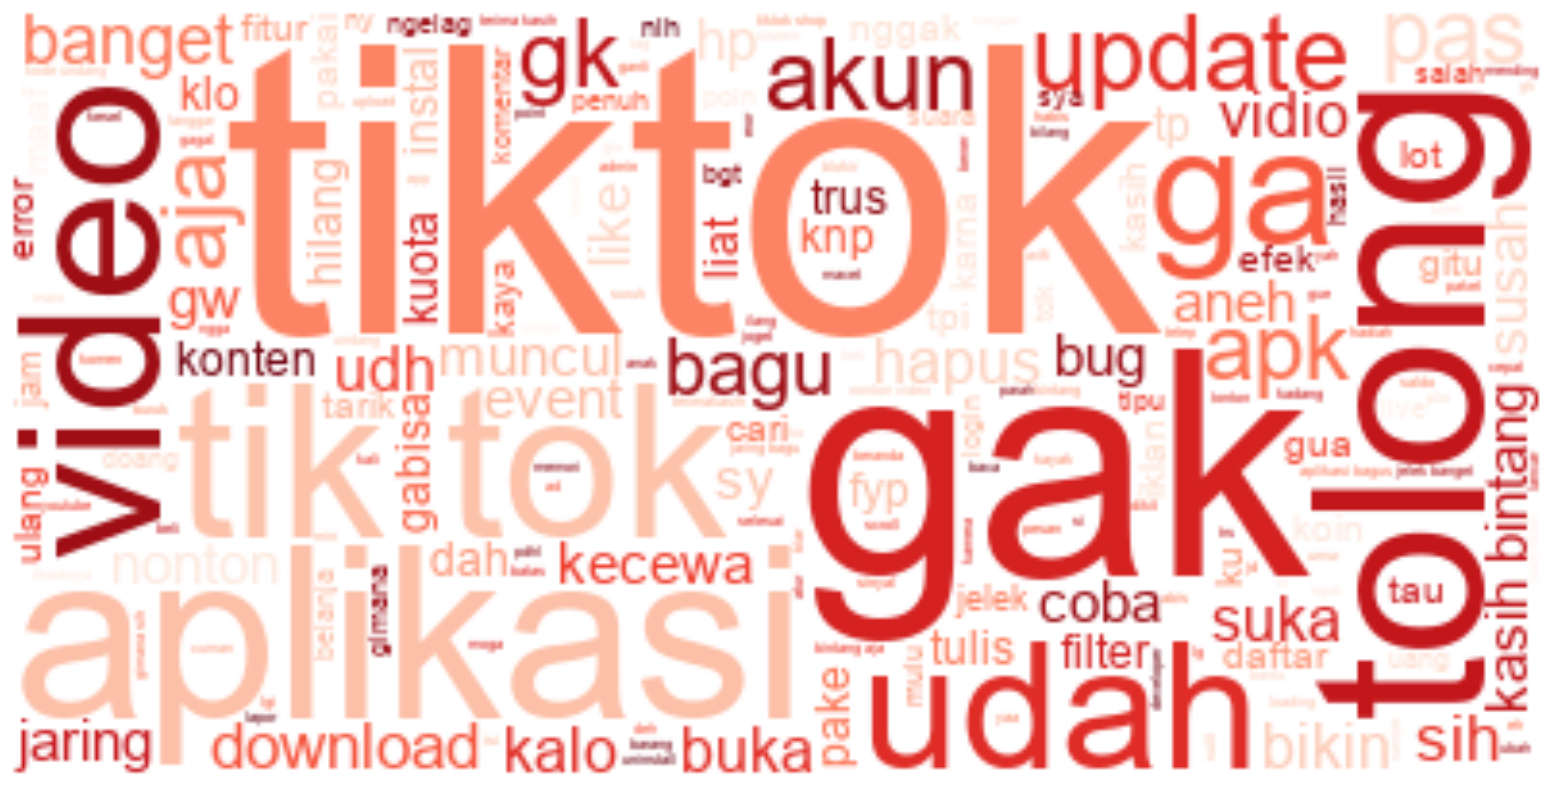

In [521]:
# Menentukan set stopwords
stopwords = set(STOPWORDS)

# Menentukan path font Arial
font_path = "./Arial.ttf"  # Ganti dengan path yang benar ke font Arial

# Membuat objek WordCloud dengan font Arial
wordcloud = WordCloud(stopwords=stopwords_indo, background_color="white", font_path=font_path, colormap="Reds").generate(filtered_negative)

# Menampilkan WordCloud
plt.figure(figsize=(25, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [522]:
df_new.to_excel('hasil_clean_klasifikasi.xlsx', encoding="utf8", index=False)

In [523]:
df = pd.read_excel('hasil_clean_klasifikasi.xlsx')

df.remove_punct

0       point nonton video durasi menit macet masuk ko...
1                              aplikasi guna selagi bosan
2                                         foto gak simpan
3                             update ngelag tiktok seppia
4       aplikasi bagus vitur bagus tik tok fidio langg...
                              ...                        
3154    sistem buruk konten hapus aktivitas telanjang ...
3155    aplikasi bagus suka aplikasi aplikasi hibur pa...
3156                     kerin bagus sanggar batu bangget
3157    apk bagus banget suka lo yg suka komentar apk ...
3158    aplikasi seru suka aplikasi senang bikin vidio...
Name: remove_punct, Length: 3159, dtype: object

# Feature Extraction

In [524]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [525]:
tfidfconverter_unigram = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range = (1,2))

## Unigram

In [526]:
X_unigram = tfidfconverter_unigram.fit_transform(df.remove_punct).toarray()
X_unigram = pd.DataFrame(X_unigram, columns = tfidfconverter_unigram.get_feature_names_out())
X_unigram

,abis,abis update,ad,ad yg,adain,admin,admin tiktok,agama,ah,aj,...,yg tiktok,yg upload,yh,yng,yok,you,youtube,yuk,zaman,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Perbandingan Data

In [527]:
df.head()

,score,content,label,remove_url,emoji_casefold,rm_whitespace,rm_stopwords,remove_punct
0,1,Point nonton video durasi 30 menit macet dan m...,0,Point nonton video durasi 30 menit macet dan m...,point nonton video durasi menit macet dan m...,point nonton video durasi menit macet dan m...,"['point', 'nonton', 'video', 'durasi', 'menit'...",point nonton video durasi menit macet masuk ko...
1,5,Aplikasi ini sangat berguna untuk orang yang s...,1,Aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,aplikasi ini sangat berguna untuk orang yang s...,"['aplikasi', 'guna', 'selagi', 'bosan']",aplikasi guna selagi bosan
2,5,Foto nya gak bisa di simpan,1,Foto nya gak bisa di simpan,foto nya gak bisa di simpan,foto nya gak bisa di simpan,"['foto', 'gak', 'simpan']",foto gak simpan
3,1,makin update makin ngelag🤬 sekarang tiktok mak...,0,makin update makin ngelag🤬 sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,makin update makin ngelag sekarang tiktok mak...,"['update', 'ngelag', 'tiktok', 'seppia']",update ngelag tiktok seppia
4,4,Aplikasi nya bagus vitur nya juga bagus tapi t...,1,Aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,aplikasi nya bagus vitur nya juga bagus tapi t...,"['aplikasi', 'bagus', 'vitur', 'bagus', 'tik',...",aplikasi bagus vitur bagus tik tok fidio langg...


## Base Line

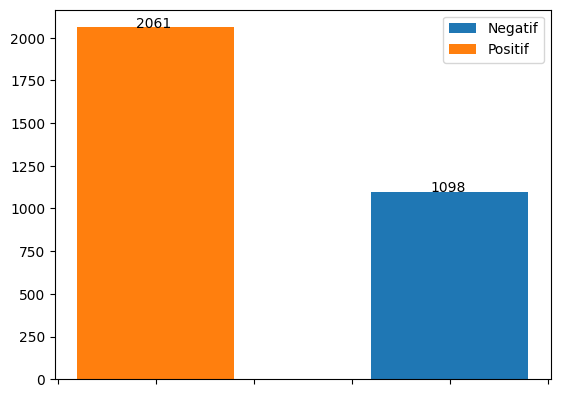

In [528]:
cls, counts = np.unique(df_new.label, return_counts=True)
plt.bar(2.5 , counts[0], label='Negatif'), plt.text(2.4, counts[0], counts[0])
plt.bar(1 , counts[1], label='Positif'), plt.text(0.9, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

In [529]:
X_unigram, y_unigram = X_unigram, df_new.label
df_unigram = pd.concat([X_unigram,y_unigram], axis=1)
# df_unigram = df_unigram.sample(frac = 1)
X_unigram = df_unigram.drop('label', axis=1)
y_unigram = df_unigram.label

## Over Sampling Data

In [530]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

In [531]:
np.unique(df_new.label, return_counts=True)

(array([0, 1], dtype=int64), array([1098, 2061], dtype=int64))

In [532]:
df_new.label.isna().sum()

0

In [533]:
X_smote_unigram, y_smote_unigram = sm.fit_resample(X_unigram, df_new.label)
df_unigram = pd.concat([X_smote_unigram,y_smote_unigram], axis=1)
df_unigram = df_unigram.sample(frac = 1)
X_smote_unigram = df_unigram.drop('label', axis=1)
y_smote_unigram = df_unigram.label

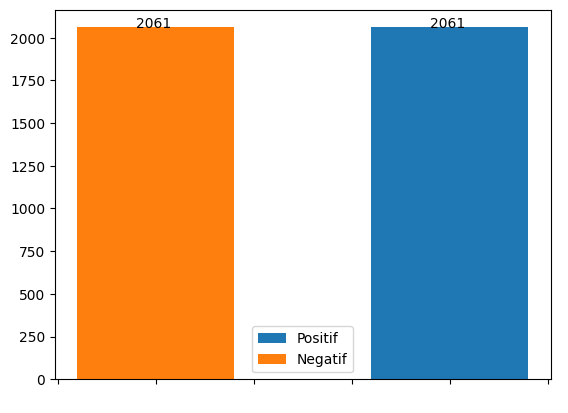

In [534]:
cls, counts = np.unique(y_smote_unigram, return_counts=True)
plt.bar(2.5 , counts[0], label='Positif'), plt.text(2.4, counts[0], counts[0])
plt.bar(1 , counts[1], label='Negatif'), plt.text(0.9, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

## Under Sampling

In [535]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

In [536]:
X_undersm_unigram, y_undersm_unigram = rus.fit_resample(X_unigram, df_new.label)
df_unigram = pd.concat([X_undersm_unigram,y_undersm_unigram], axis=1)
df_unigram = df_unigram.sample(frac = 1)
X_undersm_unigram = df_unigram.drop('label', axis=1)
y_undersm_unigram = df_unigram.label

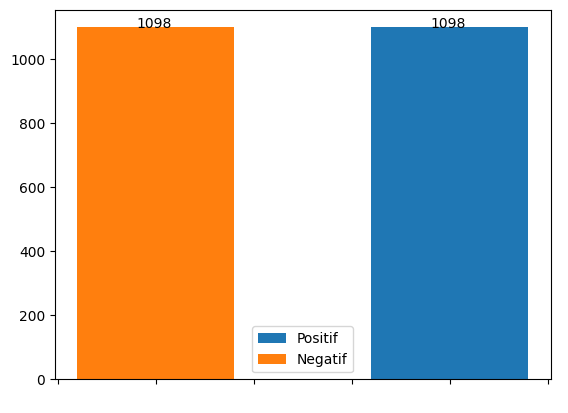

In [537]:
cls, counts = np.unique(y_undersm_unigram, return_counts=True)
plt.bar(2.5 , counts[0], label='Positif'), plt.text(2.4, counts[0], counts[0])
plt.bar(1 , counts[1], label='Negatif'), plt.text(0.9, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

# Modeling Without Cross Validation

## Tanpa SMOTE

In [538]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

In [539]:

X = df['remove_punct']
y = df['label']

x_train,x_test,y_train,y_test = train_test_split(X_unigram,y_unigram,random_state=1,test_size=0.2,stratify=y)
jumlah_data = len(df)
print(y_train.value_counts())
print("Jumlah data:", jumlah_data)

1    1649
0     878
Name: label, dtype: int64
Jumlah data: 3159


In [540]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range = (1,2))

In [541]:


print(x_train.shape)
print(x_test.shape)

(2527, 1568)
(632, 1568)


In [542]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ........................alpha=0.1;, score=0.771 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;, score=0.798 total time=   0.0s
[CV 3/10] END ........................alpha=0.1;, score=0.818 total time=   0.0s
[CV 4/10] END ........................alpha=0.1;, score=0.822 total time=   0.0s
[CV 5/10] END ........................alpha=0.1;, score=0.826 total time=   0.0s
[CV 6/10] END ........................alpha=0.1;, score=0.822 total time=   0.0s
[CV 7/10] END ........................alpha=0.1;, score=0.818 total time=   0.0s
[CV 8/10] END ........................alpha=0.1;, score=0.806 total time=   0.0s
[CV 9/10] END ........................alpha=0.1;, score=0.829 total time=   0.0s
[CV 10/10] END .......................alpha=0.1;, score=0.829 total time=   0.0s
[CV 1/10] END ........................alpha=0.5;, score=0.767 total time=   0.0s
[CV 2/10] END ........................alpha=0.5;

<AxesSubplot:>

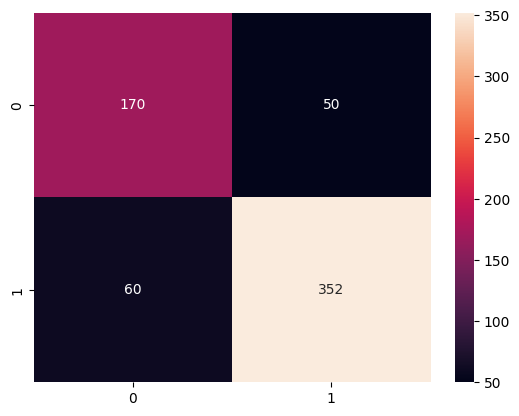

In [543]:
scores = []
score = 0
best_score = 0
best_feature_number = 0


#Proses Klasifikasi
# classifier = DecisionTreeClassifier()
# classifier = KNeighborsClassifier()
# classifier = SVC()
# classifier = xgb.XGBClassifier()
# classifier = GradientBoostingClassifier()
classifier = MultinomialNB()
    
    # optimasi hyperparameter
param_grid = [
    # {'n_neighbors':[1,3,5,7,9], 'weights':['uniform', 'distance'], 'p': [1,2]}
#     {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['linear']},
    {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
    # {'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    # {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    # {'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3]}
    # {'n_estimators': [50, 100, 150, 200],  
    #     #'min_child_weight': [1, 5, 10],
    #     'learning_rate': [0.1,0.2,0.3],
    #     #'gamma': [0.5, 1, 1.5, 2, 5],
    #     'subsample': [0.6, 0.8, 1.0],
    #     #'colsample_bytree': [0.6, 0.8, 1.0],
    #     'max_depth': [5, 10, 15]
    #  }
    ]

model = GridSearchCV(classifier, param_grid, cv=10, refit = True, verbose = 3) 
    # fitting the model for grid search 
model.fit(x_train, y_train)

    # print best parameter after tuning 
print(model.best_params_) 
      

pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.3g')

## Dengan SMOTE

In [544]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train) 
print(y_train_res.value_counts())

0    1649
1    1649
Name: label, dtype: int64


Accuracy  0.7990506329113924
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       220
           1       0.92      0.76      0.83       412

    accuracy                           0.80       632
   macro avg       0.79      0.82      0.79       632
weighted avg       0.83      0.80      0.80       632



<AxesSubplot:>

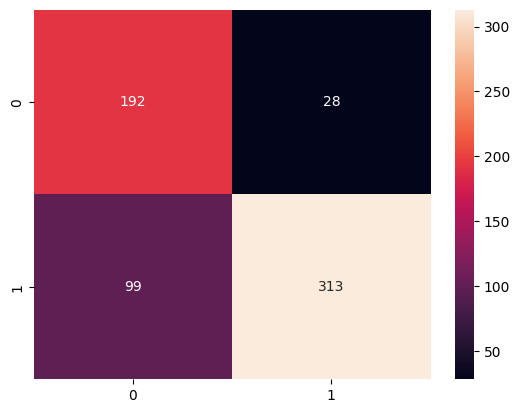

In [545]:
lr = MultinomialNB(alpha=0.5)
lr.fit(X_train_res, y_train_res) 
predictions = lr.predict(x_test) 

print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.4g')

# Modeling With K-Fold


In [546]:
def plot_accuracy(acc):
    plt.plot(range(1, len(acc)+1), acc, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy in Each Fold')
    plt.xticks(range(1, len(acc)+1))
    plt.show()

In [547]:
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn

In [548]:
from sklearn.model_selection import KFold

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True)

In [549]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

def Predict(X, Y):
    fold = 0
    acc = []

    for train_index, test_index in kf.split(X):
        fold += 1
        print(f'Fold ke-{fold}')
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]

        my_model = MultinomialNB(alpha=0.5)

        # Training Classifier Model
        my_model.fit(X_train, y_train)

        # Melakukan Prediksi
        y_predict = my_model.predict(X_test)
    

        # Membandingkan hasil Prediksi terhadap data asli
        print("Classification Report")
        print(classification_report(y_test, y_predict))
        akurasi = np.round(accuracy_score(y_test, y_predict), 4) * 100
        print(f'Accuracy: {akurasi}%')
        acc.append(akurasi)

        cnf_matrix = confusion_matrix(y_test, y_predict)
        s = sn.heatmap(cnf_matrix / np.sum(cnf_matrix),
                       annot=True,
                       fmt='.2%',
                       xticklabels=['Negatif', 'Positif'],
                       yticklabels=['Negatif', 'Positif'])
        s.set_xlabel('Predicted Label')
        s.set_ylabel('True Label')

        # Plot the hyperplane
        
        plt.show()
        print('-' * 100)

    print('=' * 100)
    print(f'{fold} Fold Validation Mean Accuracy')
    print('akurasi tertinggi : ', np.max(acc))
    print('akurasi terendah : ', np.min(acc))
    print('rata-rata akurasi : ', np.mean(acc))
    plot_accuracy(acc)


## hasil akurasi base line

Fold ke-1
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       107
           1       0.87      0.82      0.84       209

    accuracy                           0.80       316
   macro avg       0.78      0.79      0.78       316
weighted avg       0.81      0.80      0.80       316

Accuracy: 80.06%


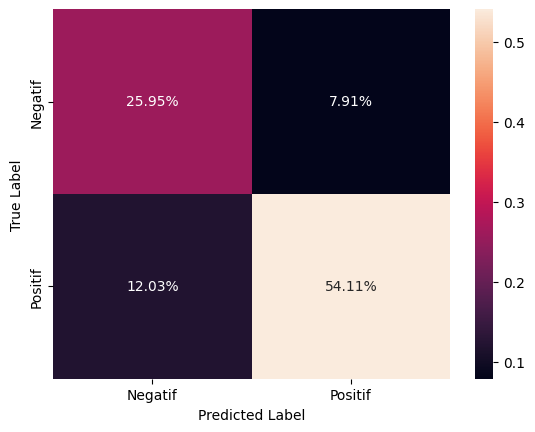

----------------------------------------------------------------------------------------------------
Fold ke-2
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       101
           1       0.87      0.91      0.89       215

    accuracy                           0.84       316
   macro avg       0.83      0.81      0.82       316
weighted avg       0.84      0.84      0.84       316

Accuracy: 84.49%


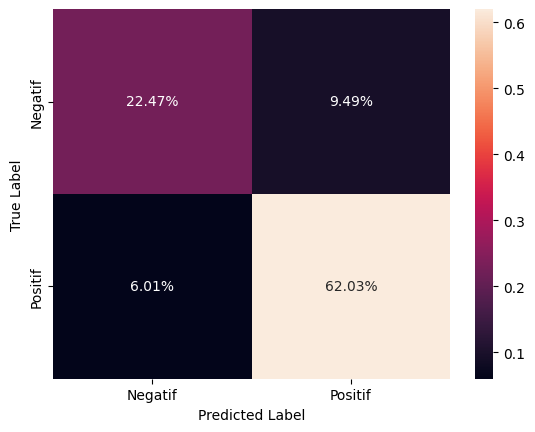

----------------------------------------------------------------------------------------------------
Fold ke-3
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       119
           1       0.87      0.88      0.88       197

    accuracy                           0.85       316
   macro avg       0.84      0.84      0.84       316
weighted avg       0.85      0.85      0.85       316

Accuracy: 84.81%


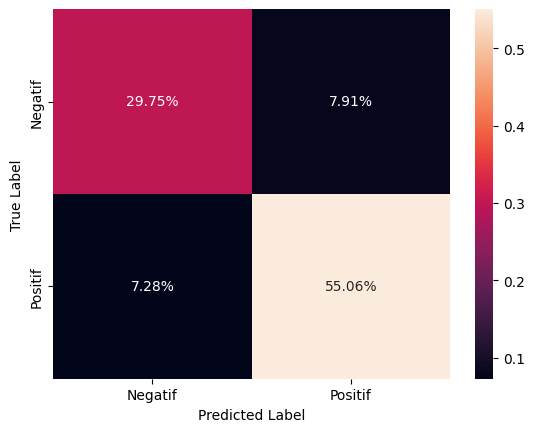

----------------------------------------------------------------------------------------------------
Fold ke-4
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        99
           1       0.89      0.88      0.88       217

    accuracy                           0.84       316
   macro avg       0.81      0.82      0.82       316
weighted avg       0.84      0.84      0.84       316

Accuracy: 84.17999999999999%


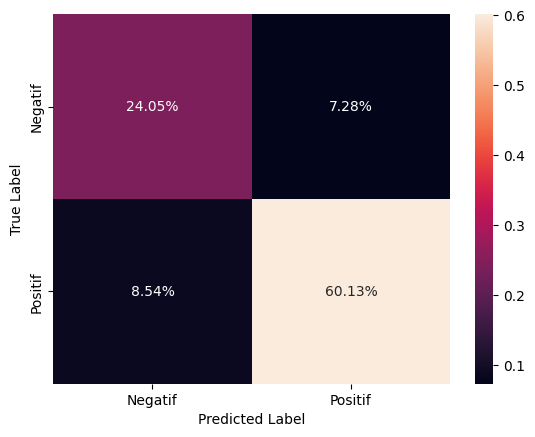

----------------------------------------------------------------------------------------------------
Fold ke-5
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       110
           1       0.87      0.87      0.87       206

    accuracy                           0.83       316
   macro avg       0.82      0.81      0.81       316
weighted avg       0.83      0.83      0.83       316

Accuracy: 83.23%


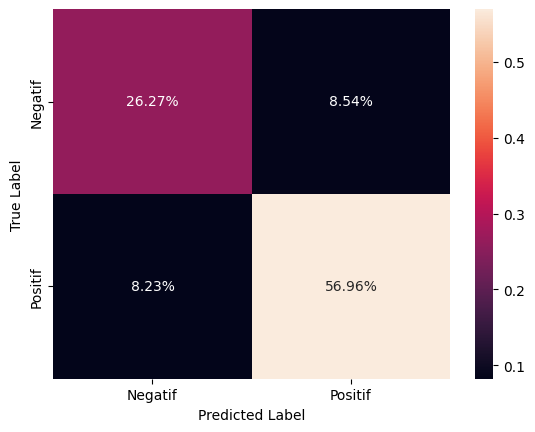

----------------------------------------------------------------------------------------------------
Fold ke-6
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       119
           1       0.81      0.89      0.85       197

    accuracy                           0.80       316
   macro avg       0.80      0.78      0.78       316
weighted avg       0.80      0.80      0.80       316

Accuracy: 80.38%


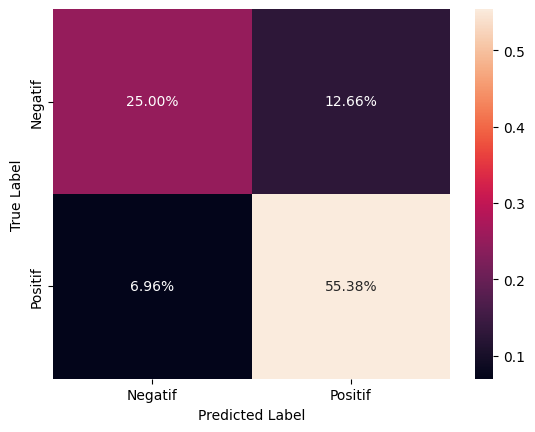

----------------------------------------------------------------------------------------------------
Fold ke-7
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       106
           1       0.89      0.90      0.89       210

    accuracy                           0.86       316
   macro avg       0.84      0.84      0.84       316
weighted avg       0.86      0.86      0.86       316

Accuracy: 85.76%


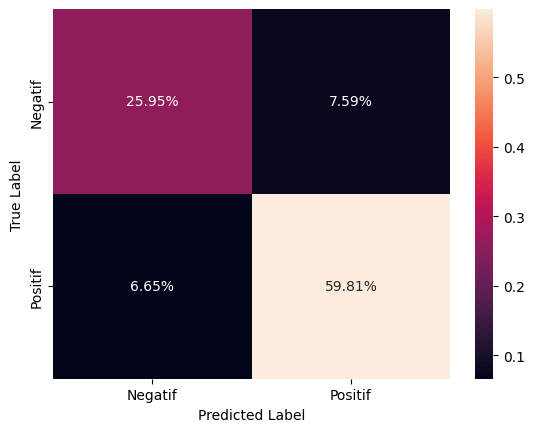

----------------------------------------------------------------------------------------------------
Fold ke-8
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       121
           1       0.86      0.82      0.84       195

    accuracy                           0.81       316
   macro avg       0.80      0.81      0.80       316
weighted avg       0.81      0.81      0.81       316

Accuracy: 81.01%


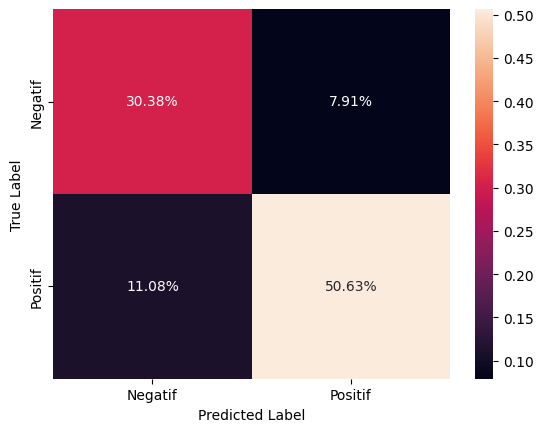

----------------------------------------------------------------------------------------------------
Fold ke-9
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       106
           1       0.89      0.85      0.87       210

    accuracy                           0.83       316
   macro avg       0.81      0.82      0.82       316
weighted avg       0.84      0.83      0.83       316

Accuracy: 83.23%


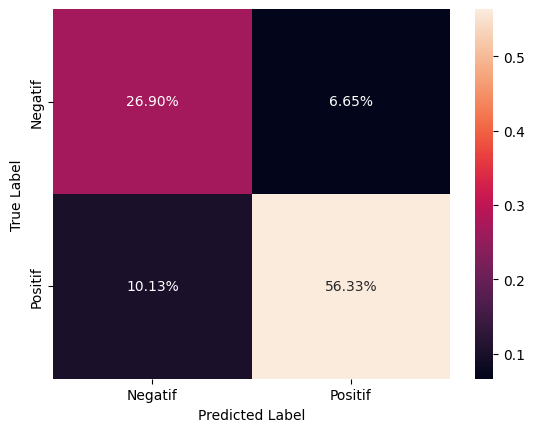

----------------------------------------------------------------------------------------------------
Fold ke-10
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       110
           1       0.87      0.83      0.85       205

    accuracy                           0.81       315
   macro avg       0.79      0.80      0.79       315
weighted avg       0.81      0.81      0.81       315

Accuracy: 80.95%


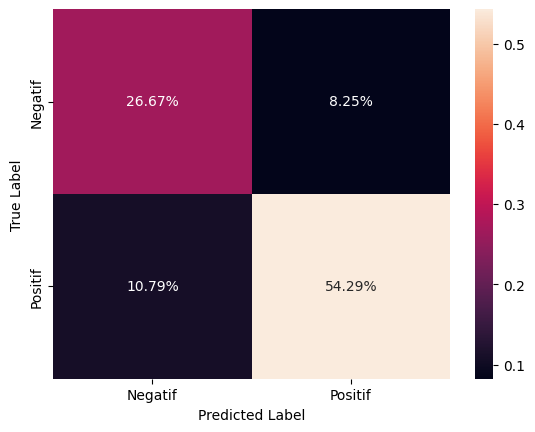

----------------------------------------------------------------------------------------------------
10 Fold Validation Mean Accuracy
akurasi tertinggi :  85.76
akurasi terendah :  80.06
rata-rata akurasi :  82.81000000000002


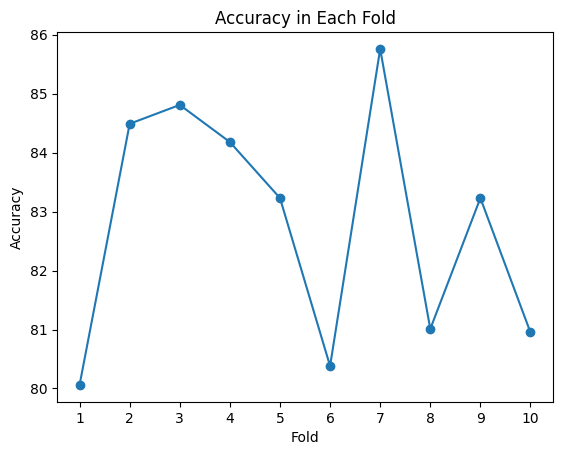

In [550]:
Predict(X_unigram, y_unigram)

## hasil akurasi smote over sampling

Fold ke-1
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       220
           1       0.85      0.79      0.82       193

    accuracy                           0.84       413
   macro avg       0.84      0.84      0.84       413
weighted avg       0.84      0.84      0.84       413

Accuracy: 84.02%


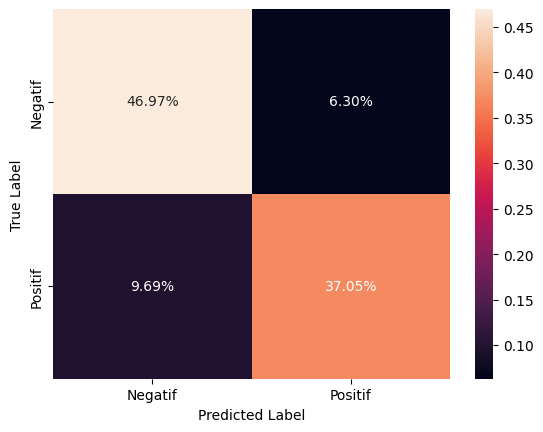

----------------------------------------------------------------------------------------------------
Fold ke-2
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       207
           1       0.89      0.83      0.86       206

    accuracy                           0.86       413
   macro avg       0.87      0.86      0.86       413
weighted avg       0.87      0.86      0.86       413

Accuracy: 86.44%


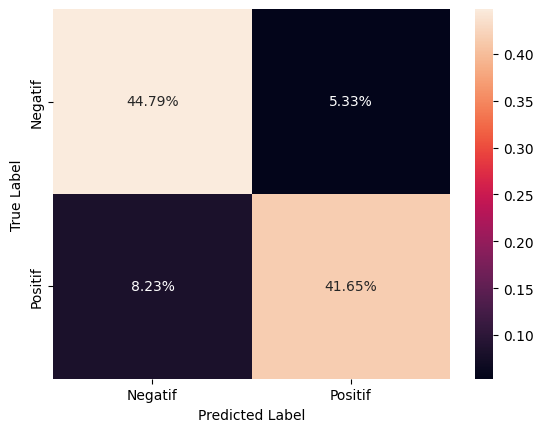

----------------------------------------------------------------------------------------------------
Fold ke-3
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       203
           1       0.88      0.73      0.80       209

    accuracy                           0.81       412
   macro avg       0.82      0.81      0.81       412
weighted avg       0.82      0.81      0.81       412

Accuracy: 81.31%


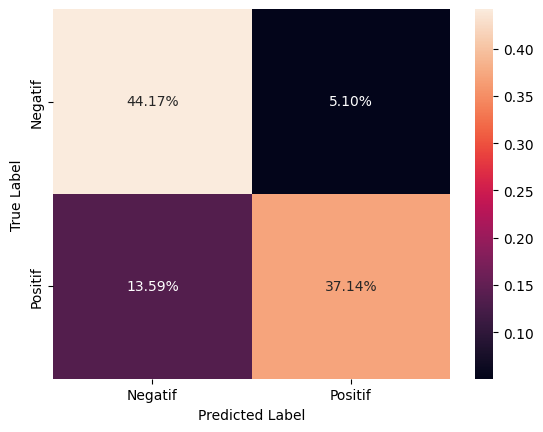

----------------------------------------------------------------------------------------------------
Fold ke-4
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       222
           1       0.90      0.84      0.87       190

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

Accuracy: 88.11%


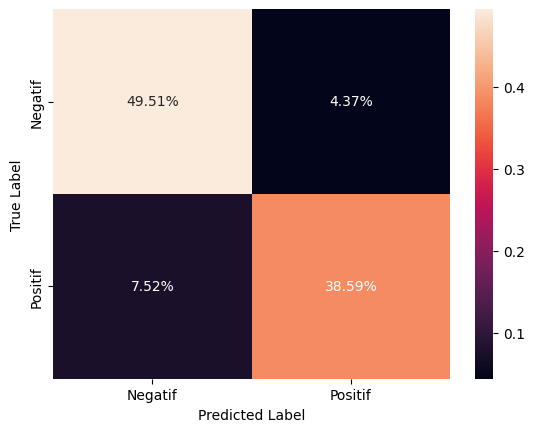

----------------------------------------------------------------------------------------------------
Fold ke-5
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       200
           1       0.91      0.75      0.82       212

    accuracy                           0.83       412
   macro avg       0.85      0.84      0.83       412
weighted avg       0.85      0.83      0.83       412

Accuracy: 83.5%


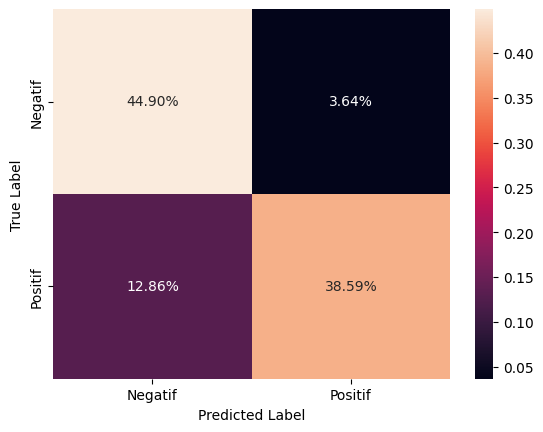

----------------------------------------------------------------------------------------------------
Fold ke-6
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       193
           1       0.93      0.80      0.86       219

    accuracy                           0.86       412
   macro avg       0.86      0.86      0.86       412
weighted avg       0.87      0.86      0.86       412

Accuracy: 85.92%


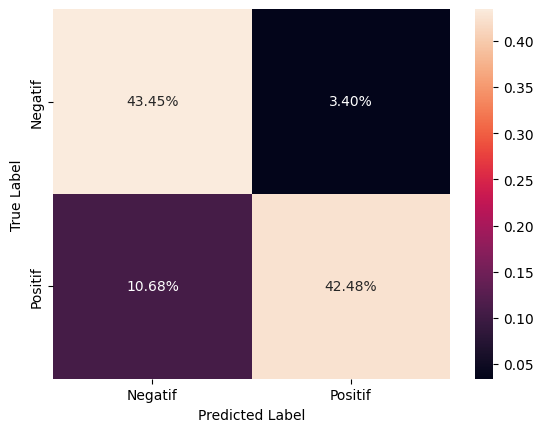

----------------------------------------------------------------------------------------------------
Fold ke-7
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       201
           1       0.87      0.82      0.85       211

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412

Accuracy: 84.71%


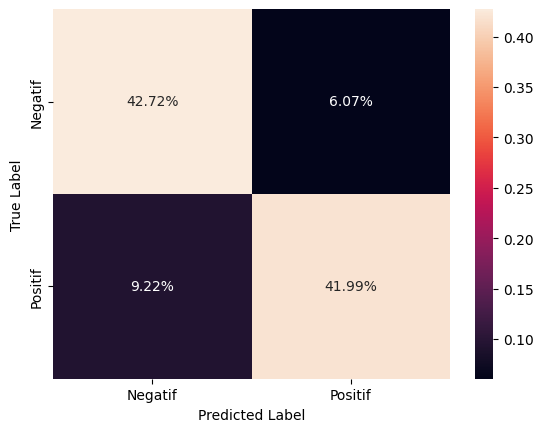

----------------------------------------------------------------------------------------------------
Fold ke-8
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       194
           1       0.94      0.82      0.87       218

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

Accuracy: 87.62%


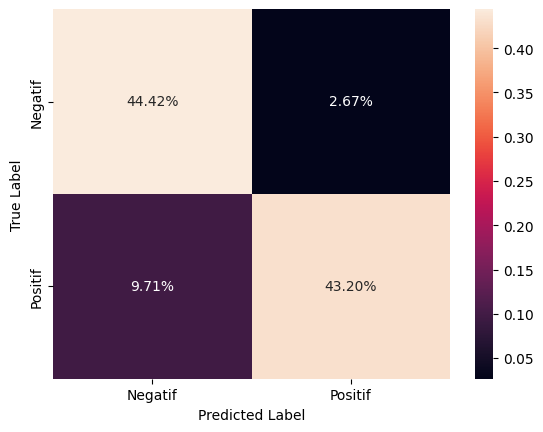

----------------------------------------------------------------------------------------------------
Fold ke-9
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       210
           1       0.92      0.80      0.85       202

    accuracy                           0.87       412
   macro avg       0.87      0.87      0.87       412
weighted avg       0.87      0.87      0.87       412

Accuracy: 86.65%


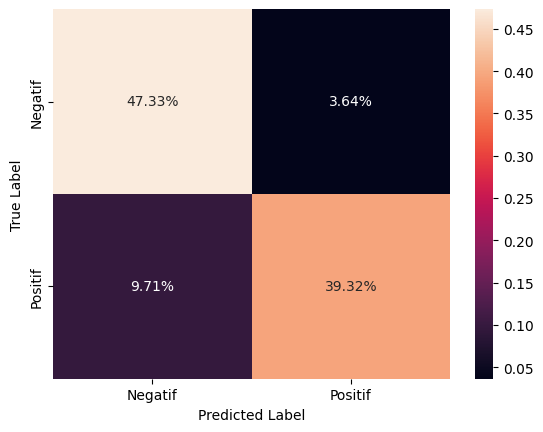

----------------------------------------------------------------------------------------------------
Fold ke-10
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       211
           1       0.88      0.77      0.82       201

    accuracy                           0.83       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.83      0.83       412

Accuracy: 83.5%


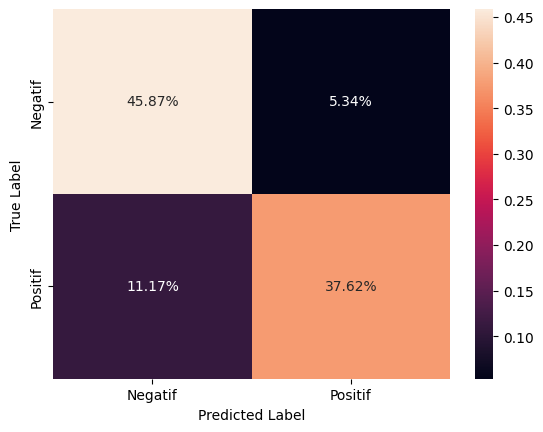

----------------------------------------------------------------------------------------------------
10 Fold Validation Mean Accuracy
akurasi tertinggi :  88.11
akurasi terendah :  81.31
rata-rata akurasi :  85.178


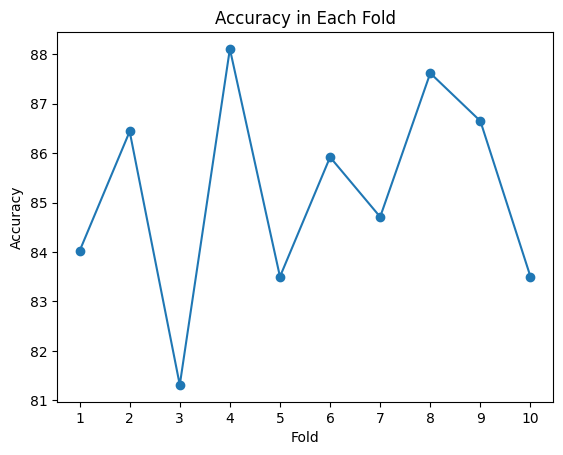

In [551]:
Predict(X_smote_unigram, y_smote_unigram)

## hasil akurasi smote under sampling

Fold ke-1
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       118
           1       0.88      0.76      0.82       102

    accuracy                           0.84       220
   macro avg       0.85      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

Accuracy: 84.09%


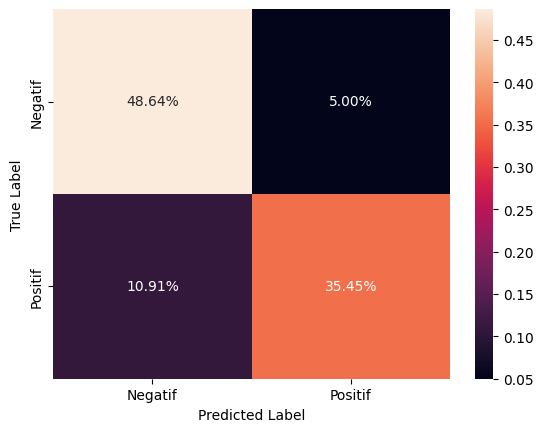

----------------------------------------------------------------------------------------------------
Fold ke-2
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       113
           1       0.87      0.80      0.83       107

    accuracy                           0.85       220
   macro avg       0.85      0.84      0.84       220
weighted avg       0.85      0.85      0.85       220

Accuracy: 84.55%


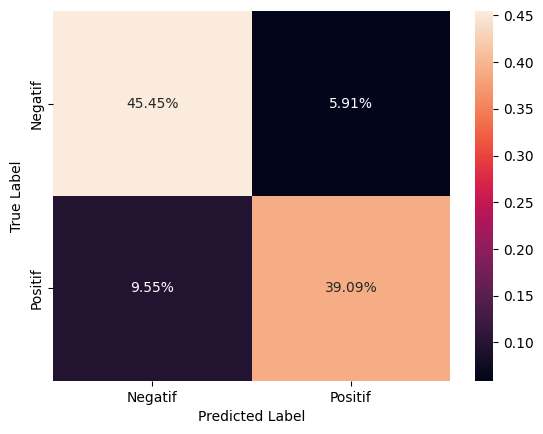

----------------------------------------------------------------------------------------------------
Fold ke-3
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       115
           1       0.82      0.78      0.80       105

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220

Accuracy: 81.36%


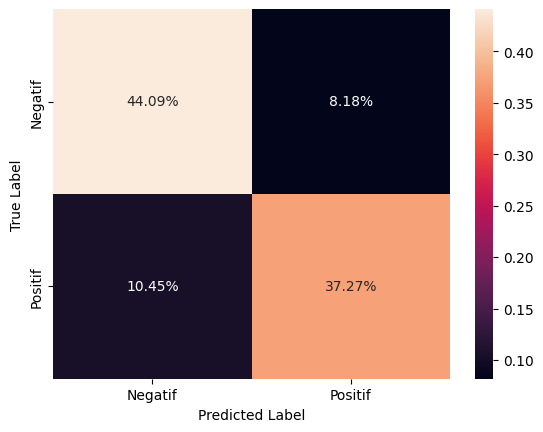

----------------------------------------------------------------------------------------------------
Fold ke-4
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       106
           1       0.82      0.75      0.78       114

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220

Accuracy: 78.18%


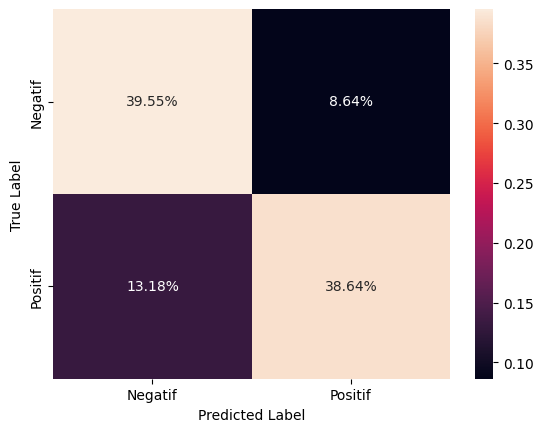

----------------------------------------------------------------------------------------------------
Fold ke-5
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       111
           1       0.86      0.77      0.81       109

    accuracy                           0.82       220
   macro avg       0.83      0.82      0.82       220
weighted avg       0.83      0.82      0.82       220

Accuracy: 82.27%


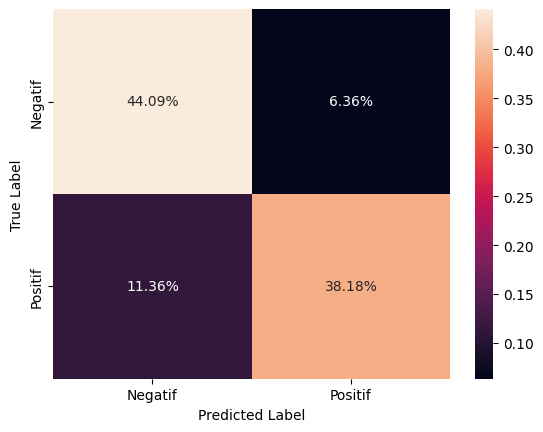

----------------------------------------------------------------------------------------------------
Fold ke-6
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.88      0.77      0.82       120

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.83      0.82      0.82       220

Accuracy: 81.82000000000001%


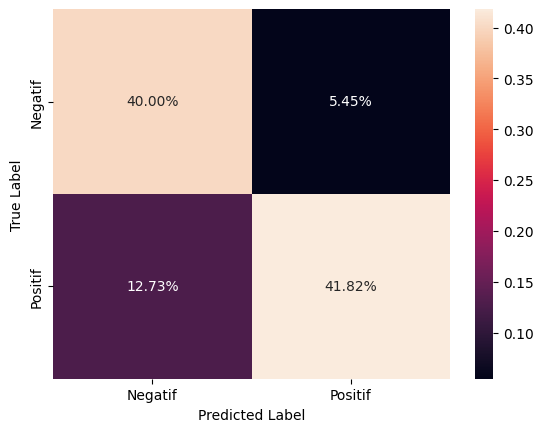

----------------------------------------------------------------------------------------------------
Fold ke-7
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        94
           1       0.90      0.75      0.82       125

    accuracy                           0.81       219
   macro avg       0.82      0.82      0.81       219
weighted avg       0.83      0.81      0.81       219

Accuracy: 81.28%


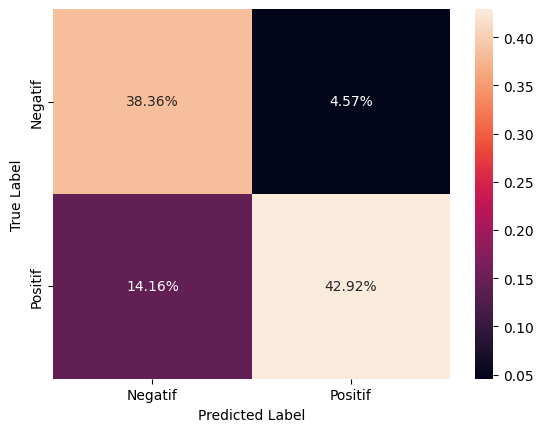

----------------------------------------------------------------------------------------------------
Fold ke-8
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       120
           1       0.85      0.72      0.78        99

    accuracy                           0.81       219
   macro avg       0.82      0.80      0.81       219
weighted avg       0.82      0.81      0.81       219

Accuracy: 81.28%


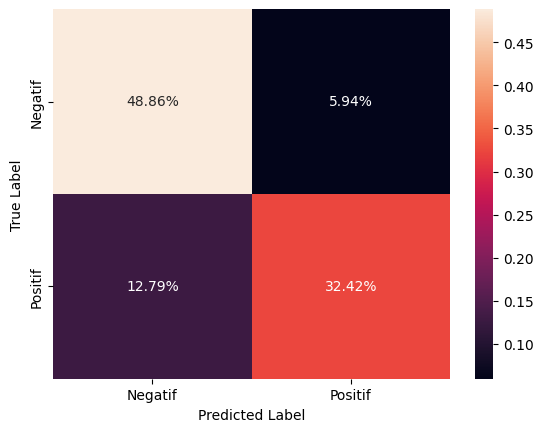

----------------------------------------------------------------------------------------------------
Fold ke-9
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       114
           1       0.77      0.82      0.79       105

    accuracy                           0.79       219
   macro avg       0.80      0.80      0.79       219
weighted avg       0.80      0.79      0.79       219

Accuracy: 79.45%


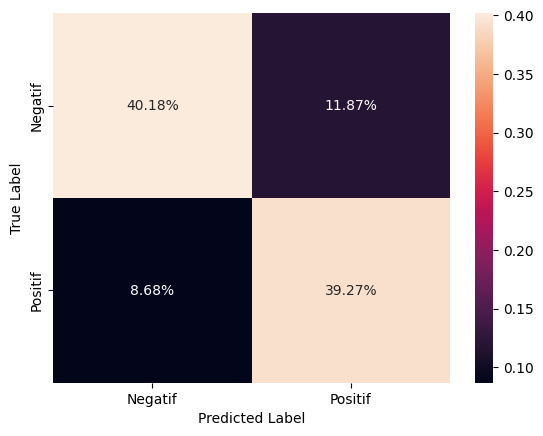

----------------------------------------------------------------------------------------------------
Fold ke-10
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.88      0.81      0.85       112

    accuracy                           0.85       219
   macro avg       0.85      0.85      0.85       219
weighted avg       0.85      0.85      0.85       219

Accuracy: 84.93%


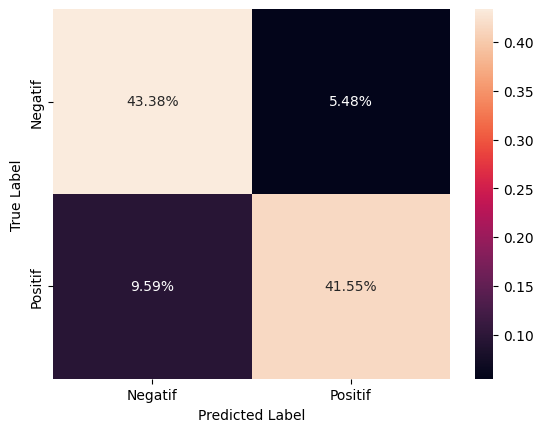

----------------------------------------------------------------------------------------------------
10 Fold Validation Mean Accuracy
akurasi tertinggi :  84.93
akurasi terendah :  78.18
rata-rata akurasi :  81.921


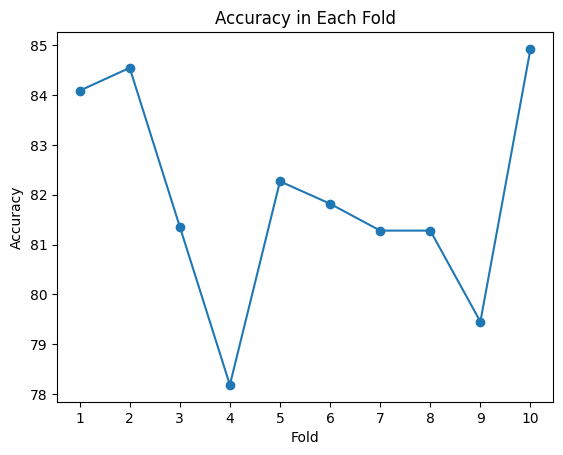

In [552]:
Predict(X_undersm_unigram, y_undersm_unigram)